In [30]:
import pandas as pd 

df_classwise=pd.read_csv("/kaggle/input/classwise-balanced-ciciot-2023/ClassWise_Labeled_Balanced_Dataset.csv")
df_binary_Normal=pd.read_csv("/kaggle/input/binary-classified-ciciot-2023-dataset/Normal_baised_data.csv")
df_perfect_binary=pd.read_csv("/kaggle/input/binary-classified-ciciot-2023-dataset/EqualBinaryData_CICIoT_2023.csv")

<h3>For Normal_Baised_data.csv : DecisionTreeClassifier got highest accuracy 94% on this parameters(max_depth=20,min_samples_split=20,random_state=42).
</h3>
<br>

<h3>For EqualBinaryData_CICIoT_2023.csv : DecisionTreeClassifier got highest 99.7% with checking the overfitting validtions</h3>

In [31]:

#for Normal_baised_data.csv
# df=pd.DataFrame(df_binary_Normal)

#For Perfect binary 
# df=pd.DataFrame(df_perfect_binary)

#For Multi class
df=pd.DataFrame(df_classwise)


In [32]:
import numpy as np
df['Label'].value_counts()

Label
RECON         11130
MIRAI         10941
DOS           10851
Normal        10630
DDOS          10419
SPOOFING      10314
BRUTEFORCE     9845
WEB_BASED      8065
Name: count, dtype: int64

# Binary Data

# Preprocessing

<h3>For multi class Target Labels</h3>

In [33]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()


In [34]:
df.isnull().sum()

Unnamed: 0.1       0
Unnamed: 0         0
Header_Length      0
Protocol Type      0
Time_To_Live       0
Rate               0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                2
Tot size           0
IAT                0
Number             0
Variance           2
Label              0
dtype: int64

In [35]:
(np.isinf(df['Rate'])).value_counts()

Rate
False    82193
True         2
Name: count, dtype: int64

<h2>Imputer cannot handle the infinite values in the dataset 

In [36]:
# from sklearn.impute import SimpleImputer
# impute=SimpleImputer(strategy='mean')
# test=df.copy()
# test=test.select_dtypes(include='number')
# impute.fit_transform(test)

We will replace the infinite with null values and just drop the null values as they are very few.

In [37]:
df=df.replace(np.inf,np.nan)
(np.isinf(df['Rate'])).value_counts()
df.isnull().sum()

Unnamed: 0.1       0
Unnamed: 0         0
Header_Length      0
Protocol Type      0
Time_To_Live       0
Rate               2
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                2
Tot size           0
IAT                0
Number             0
Variance           2
Label              0
dtype: int64

In [38]:
df=df.dropna()
df.isnull().sum()


Unnamed: 0.1       0
Unnamed: 0         0
Header_Length      0
Protocol Type      0
Time_To_Live       0
Rate               0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Variance           0
Label              0
dtype: int64

<h2>Decision Tree With</h2>

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [40]:
df=df.sample(frac=1,random_state=42)


In [41]:
df.reset_index(drop=True,inplace=True)

In [42]:
X=df.drop('Label',axis=1)
y=df['Label']
y_encoded=LB.fit_transform(y)


In [51]:
y_encoded=pd.DataFrame(y_encoded)
y_encoded.value_counts()

0
5    11129
3    10940
2    10851
4    10630
1    10419
6    10314
0     9845
7     8065
Name: count, dtype: int64

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.3,random_state=42)


In [92]:
min_sp=[5,10,15,20,25,30,35]
max_dp=[5,10,15,20,25,30,35]

In [95]:
DT=DecisionTreeClassifier(max_depth=10,min_samples_split=10,random_state=42)
check=DT.fit(X_train,y_train)


In [96]:
y_pre=DT.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pre))

print("Classification report:\n",classification_report(y_test,y_pre))

Accuracy: 0.9829669884013302
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2882
           1       1.00      1.00      1.00      3147
           2       1.00      1.00      1.00      3292
           3       1.00      1.00      1.00      3247
           4       1.00      1.00      1.00      3212
           5       1.00      0.88      0.93      3416
           6       1.00      1.00      1.00      3062
           7       0.85      1.00      0.92      2400

    accuracy                           0.98     24658
   macro avg       0.98      0.98      0.98     24658
weighted avg       0.99      0.98      0.98     24658



In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pre)

cm_df = pd.DataFrame(cm, index=['Actual Intrusion', 'Actual Normal'], 
                         columns=['Predicted Intrusion', 'Predicted Normal'])

print("Confusion Matrix (Counts):")
print(cm_df)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Correct vs Wrong Predictions')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

ValueError: Shape of passed values is (8, 8), indices imply (2, 2)

<h2>Validating accuracy:</h2>

<h3>Train and Test accuracy comparision</h3>

In [97]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Difference:        {train_acc - test_acc:.4f}")

if train_acc > 0.99 and (train_acc - test_acc) > 0.05:
    print("\nDIAGNOSIS: High probability of OVERFITTING.")
elif train_acc < 0.80:
    print("\nDIAGNOSIS: Likely UNDERFITTING (Model is too simple).")
else:
    print("\nDIAGNOSIS: Good Fit (Generalized well).")
    


Training Accuracy: 0.9841
Testing Accuracy:  0.9830
Difference:        0.0011

DIAGNOSIS: Good Fit (Generalized well).


<h2>Cross Validation:</h2>

In [98]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DT, X, y_encoded, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

if scores.std() > 0.03:
    print("\nWarning: High variance. Model is unstable (Overfitting).")
else:
    print("\nModel is stable.")

Cross-Validation Scores: [0.98381897 0.98357564 0.98381897 0.98272296 0.98387882]
Mean Accuracy: 0.9836
Standard Deviation: 0.0004

Model is stable.


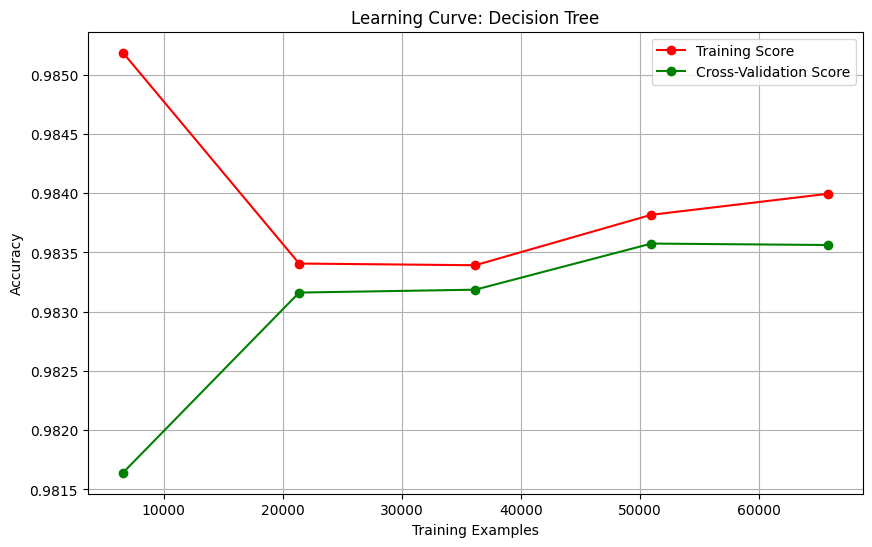

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5) # Check at 10%, 30%, ... 100% of data
    )
    
    # Calculate means
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")
    
    plt.title("Learning Curve: Decision Tree")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Run it
plot_learning_curve(DT, X, y)

In [ ]:
# df=df[df['Label']!='Normal']

In [ ]:
# # df.fillna({'Variance':df['Variance'].mean()},inplace=True)
# df.fillna({'Std':df['Std'].mean()},inplace=True)

In [ ]:
# X.isnull().sum()